In [18]:
# Imports:

## General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Data preprocessing imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Model Evaluation imports
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### XGBoost Model

In [7]:
import xgboost
from sklearn.

/Users/jacquelinemitchell/opt/anaconda3/envs/ECS171/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [8]:
total = pd.read_csv("final_baseline_data.csv")

In [9]:
# use these subsets of features
features = ['temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_3h', 'clouds_all', 'weather_main_clear',
       'weather_main_clouds', 'weather_main_drizzle', 'weather_main_fog',
       'weather_main_mist', 'weather_main_rain', 'time_of_day_day',
       'time_of_day_morning', 'time_of_day_night', 'season_fall',
       'season_spring', 'season_summer', 'season_winter', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual']

In [11]:
subset = total[features]
training, testing = train_test_split(subset, test_size=0.30, random_state=42)
X_train, y_train = training.to_numpy()[:, :-1], training.to_numpy()[:, -1]
X_test, y_test = testing.to_numpy()[:, :-1], testing.to_numpy()[:, -1]

model_xgb = xgboost.XGBRegressor(random_state=42, max_depth=8, n_estimators=800, learning_rate=0.06)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.06, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
y_train_pred = model_xgb.predict(X_train)
print("MSE Training: ", mean_squared_error(y_train, y_train_pred))
print("R2 Training: ", r2_score(y_train, y_train_pred))

MSE Training:  1.6740297912440554
R2 Training:  0.9917821975438669


In [16]:
y_test_pred = model_xgb.predict(X_test)
print("MSE Testing: ", mean_squared_error(y_test, y_test_pred))
print("R2 Testing: ", r2_score(y_test, y_test_pred))

MSE Testing:  16.127023858818948
R2 Testing:  0.9176652120670292


In [19]:
print("Training Cross Validation Scores")
cross_val_score(model_xgb, X_train, y_train)

Training Cross Validation Scores


array([0.90449367, 0.90718402, 0.90686994, 0.90369613, 0.90875105])

In [20]:
print("Testing Cross Validation Scores")
cross_val_score(model_xgb, X_test, y_test)

Testing Cross Validation Scores


array([0.85500421, 0.82977559, 0.84539588, 0.83992848, 0.85146795])

### XGBoost Shap Analysis

In [23]:
import shap

/Users/jacquelinemitchell/opt/anaconda3/envs/ECS171/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
X_train_pd = pd.DataFrame(X_train, columns=features[:-1])
X_test_pd = pd.DataFrame(X_test, columns=features[:-1])

In [25]:
explainer = shap.TreeExplainer(model_xgb, data=X_train_pd)
shap_values_train = explainer(X_train_pd)

100%|===================| 24500/24511 [17:58<00:00]        

###### BeeSwarm Plot

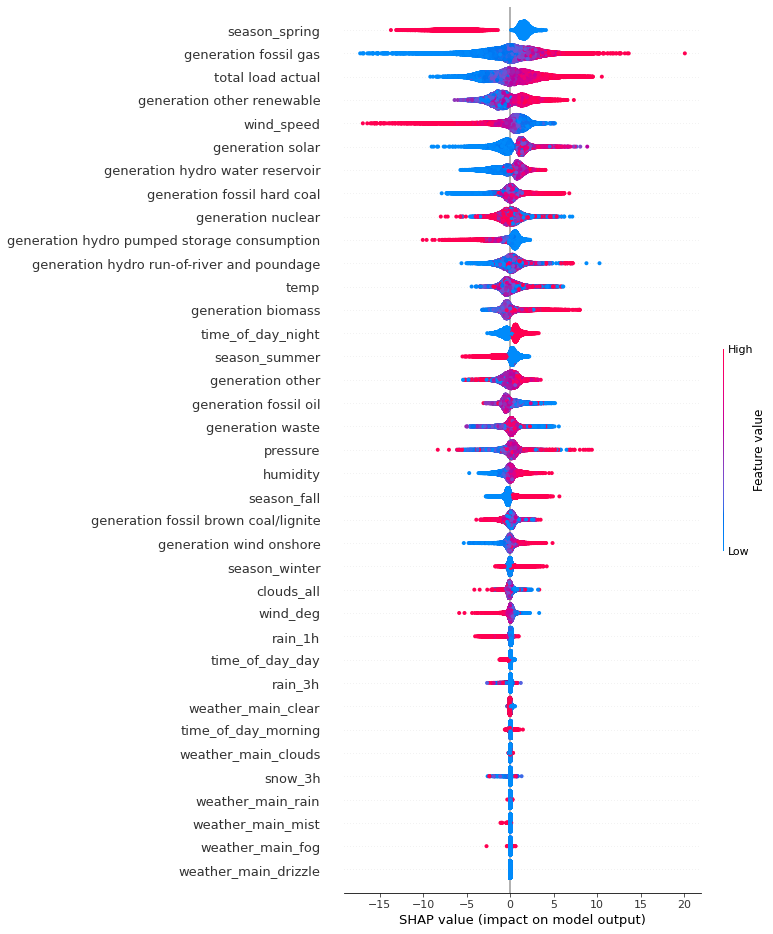

In [26]:
shap.plots.beeswarm(shap_values_train, max_display=38)

##### Bar Plot

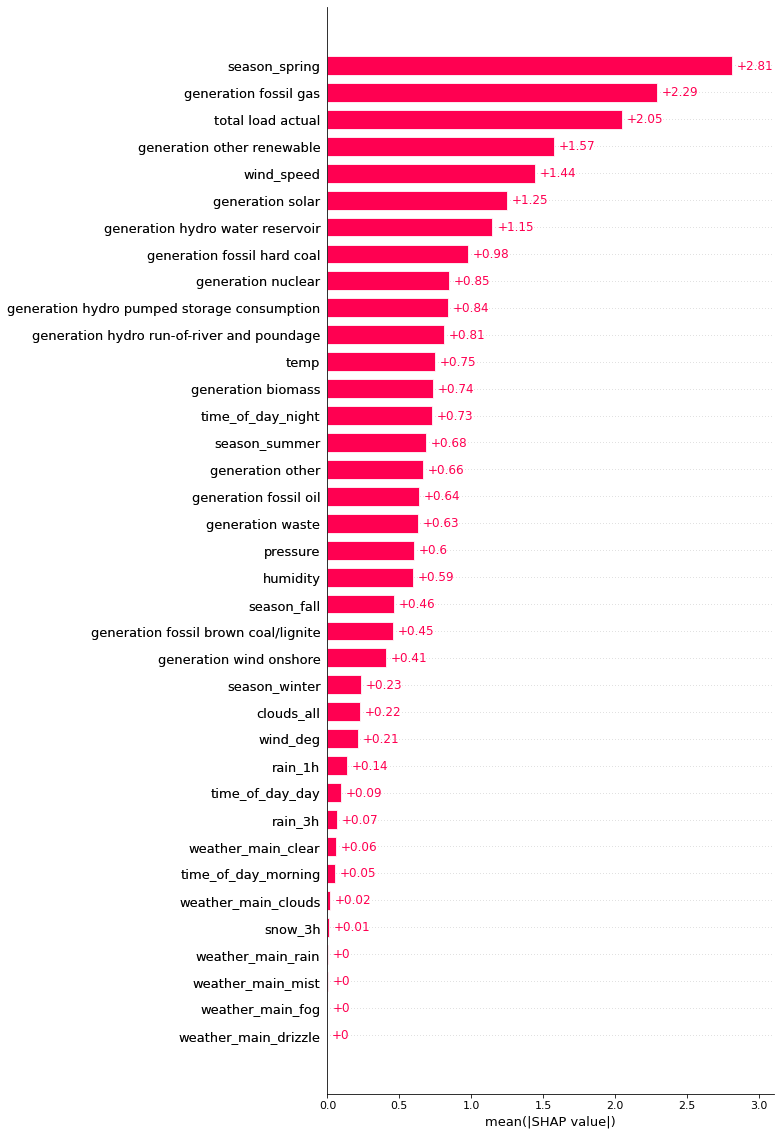

In [27]:
fig, ax = plt.subplots()
ax.tick_params(axis='both', which='major', labelsize=50)
shap.plots.bar(shap_values_train, max_display=38)